In [1]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)


In [4]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


The label is: [6]


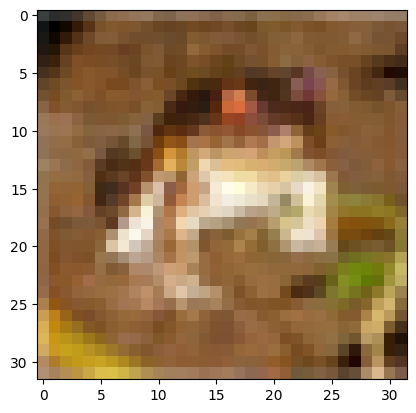

In [5]:
import matplotlib.pyplot as plt

img = plt.imshow(x_train[0])
print('The label is:', y_train[0])

The label is: [9]


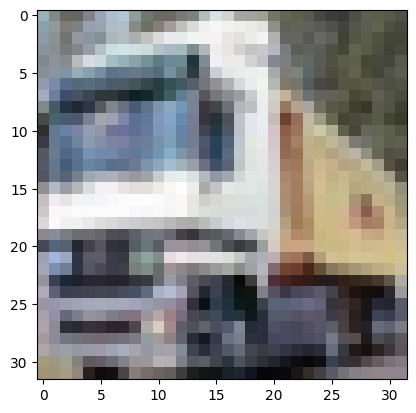

In [6]:
img = plt.imshow(x_train[1])
print('The label is:', y_train[1])

In [7]:
import keras
from keras.utils import to_categorical

y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)
print('The one hot label is:', y_train_one_hot[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train_one_hot, batch_size=32, epochs=4, validation_split=0.2)

Epoch 1/4
1250/1250 [==============================] - 21s 6ms/step - loss: 1.5211 - accuracy: 0.4396 - val_loss: 1.1154 - val_accuracy: 0.5972
Epoch 2/4
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1340 - accuracy: 0.5968 - val_loss: 0.9428 - val_accuracy: 0.6702
Epoch 3/4
1250/1250 [==============================] - 8s 6ms/step - loss: 0.9731 - accuracy: 0.6533 - val_loss: 0.8577 - val_accuracy: 0.6984
Epoch 4/4
1250/1250 [==============================] - 9s 7ms/step - loss: 0.8789 - accuracy: 0.6902 - val_loss: 0.8154 - val_accuracy: 0.7144


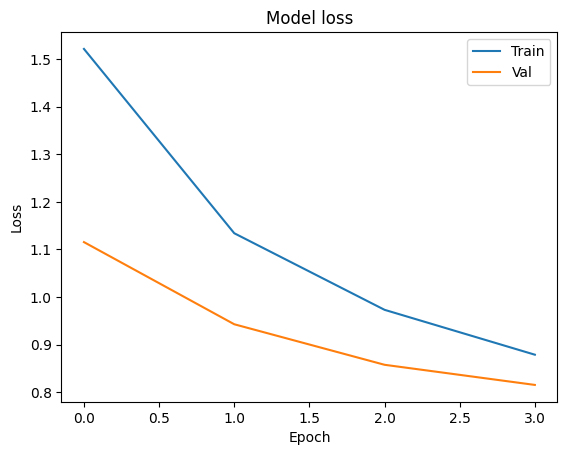

In [11]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [12]:
y_out=model.evaluate(x_test, y_test_one_hot)[1]
print(y_out)

313/313 [==============================] - 1s 4ms/step - loss: 0.8310 - accuracy: 0.7101
0.710099995136261


In [13]:
model.save('/content/drive/MyDrive/Models/my_cifar10_model.keras')
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Models/my_cifar10_model.keras')

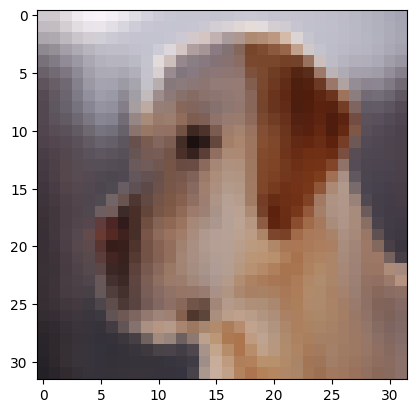

In [14]:
my_image = plt.imread("/content/drive/MyDrive/Colab Notebooks/animal/dog/1.jpg")

from skimage.transform import resize

my_image_resized = resize(my_image, (32,32,3))
img = plt.imshow(my_image_resized)

In [15]:
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(probabilities)
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:",
probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:",
probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:",
probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:",
probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:",
probabilities[0,index[5]])

1/1 [==============================] - 0s 233ms/step
[[3.8102269e-04 2.1984160e-06 7.3811084e-02 3.7675086e-02 4.1416776e-03
  8.6618704e-01 2.7826519e-03 1.4933298e-02 1.6447539e-05 6.9413341e-05]]
Most likely class: dog -- Probability: 0.86618704
Second most likely class: bird -- Probability: 0.073811084
Third most likely class: cat -- Probability: 0.037675086
Fourth most likely class: horse -- Probability: 0.014933298
Fifth most likely class: deer -- Probability: 0.0041416776
